In [14]:
import lightgbm as lgb
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle


from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE


# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [15]:
hoge = pd.read_csv("dataset/all_data_2021_2022_03.csv", index_col=0)

/var/folders/s6/7jf_zlp94gg5cpb8c5lrx2j80000gn/T/ipykernel_38110/735921726.py:1: DtypeWarning: Columns (4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  hoge = pd.read_csv("dataset/all_data_2021_2022_03.csv", index_col=0)


In [16]:
X_df = pd.read_csv("dataset/v1_features/v1.csv",index_col=0)

In [17]:
X = X_df.values

Y = hoge["tkt_1t"].values
odds = hoge["odds_1t"]

In [18]:
X_train, X_test, y_train, y_test, odds_train, odds_test = train_test_split(X, Y, odds,test_size=0.20,shuffle=False)


In [19]:
# モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(X, Y) # モデルの学習

# テストデータの予測クラス (予測クラス(0 or 1 or 2)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [20]:
filename = '0402model.sav'
pickle.dump(model, open(filename, 'wb'))

In [21]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})


# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3], 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5]})

In [22]:
df_pred.to_csv("tmp.csv" , encoding='utf_8_sig')

In [23]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [24]:
val_mat = confusion_matrix(y_test, y_pred)

val_mat

array([[6043,   97,   49,   17,    4,    7],
       [1061,  534,   45,   12,    1,    3],
       [ 932,   73,  334,   20,    4,    5],
       [ 840,   60,   39,  215,    1,    0],
       [ 436,   27,   17,    5,  128,    1],
       [ 191,   11,    5,    1,    0,  114]])

In [25]:
accuracy_score(y_test, y_pred)


0.6501941404871161

In [26]:
rec_score = recall_score(y_test, y_pred, average=None)
print(rec_score)

[0.97201222 0.32246377 0.24415205 0.18614719 0.20846906 0.35403727]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.97      0.77      6217
           2       0.67      0.32      0.43      1656
           3       0.68      0.24      0.36      1368
           4       0.80      0.19      0.30      1155
           5       0.93      0.21      0.34       614
           6       0.88      0.35      0.50       322

    accuracy                           0.65     11332
   macro avg       0.76      0.38      0.45     11332
weighted avg       0.68      0.65      0.59     11332



In [28]:
kane = 0
tousi = 0
atari = []
for target ,pred_i, odds_i in zip(y_test, y_pred, odds):
    if target == pred_i:
        kane += odds_i * 100
        atari.append(odds_i)
    tousi += 100


kane / tousi

2.6789269325803033

In [29]:
np.histogram(atari,bins=20)

(array([6406,  619,  184,   66,   25,   26,   19,    6,    2,    2,    3,
           1,    2,    0,    0,    2,    1,    1,    2,    1]),
 array([  1.   ,   7.435,  13.87 ,  20.305,  26.74 ,  33.175,  39.61 ,
         46.045,  52.48 ,  58.915,  65.35 ,  71.785,  78.22 ,  84.655,
         91.09 ,  97.525, 103.96 , 110.395, 116.83 , 123.265, 129.7  ]))

<AxesSubplot:xlabel='0'>

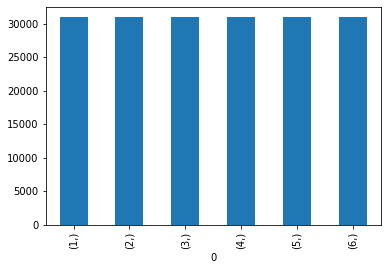

In [30]:
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(X, Y)

pd.DataFrame(y_resampled).value_counts().plot(kind="bar")

<AxesSubplot:xlabel='0'>

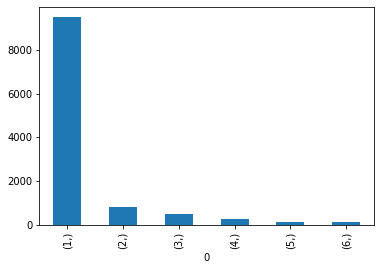

In [31]:
pd.DataFrame(y_pred).value_counts().plot(kind="bar")

<AxesSubplot:xlabel='0'>

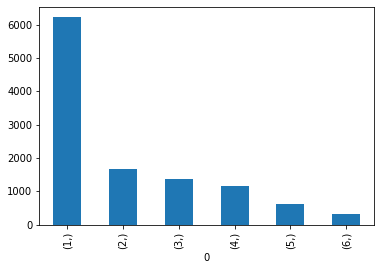

In [32]:
pd.DataFrame(y_test).value_counts().plot(kind="bar")

In [33]:
df_pred_prob

,y,target0_prob,target1_prob,target2_prob,target3_prob,target4_prob,target5_prob
0,3,0.549962,0.036337,0.242109,0.060630,0.096256,0.014705
1,3,0.530988,0.035466,0.173120,0.233394,0.021991,0.005042
2,1,0.669937,0.098170,0.145773,0.060875,0.022336,0.002910
3,2,0.762580,0.140750,0.026182,0.042170,0.015804,0.012514
4,6,0.499372,0.116414,0.205154,0.053131,0.078432,0.047497
...,...,...,...,...,...,...,...
11327,3,0.613385,0.102945,0.100897,0.035171,0.054884,0.092718
11328,1,0.552472,0.046800,0.127582,0.243203,0.024865,0.005078
11329,1,0.696619,0.062303,0.084725,0.070537,0.074974,0.010843
11330,3,0.670565,0.138813,0.065864,0.101396,0.017515,0.005847


In [34]:
# モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(x_resampled, y_resampled) # モデルの学習
filename = '0331SMOTEmodel.sav'
pickle.dump(model, open(filename, 'wb'))

# テストデータの予測クラス (予測クラス(0 or 1 or 2)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [35]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})


# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3], 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5]})

In [36]:
df_pred.to_csv("tmp.csv" , encoding='utf_8_sig')

In [37]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [38]:
val_mat = confusion_matrix(y_test, y_pred)

val_mat

array([[5192,  288,  220,  231,  153,  133],
       [ 855,  567,   78,   67,   49,   40],
       [ 780,   93,  358,   49,   49,   39],
       [ 655,   63,   50,  342,   23,   22],
       [ 348,   31,   21,   21,  182,   11],
       [ 162,    8,    6,    7,    0,  139]])

In [39]:
accuracy_score(y_test, y_pred)

0.598305683021532

In [40]:
rec_score = recall_score(y_test, y_pred, average=None)
print(rec_score)

[0.83512948 0.3423913  0.26169591 0.2961039  0.29641694 0.43167702]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.84      0.73      6217
           2       0.54      0.34      0.42      1656
           3       0.49      0.26      0.34      1368
           4       0.48      0.30      0.37      1155
           5       0.40      0.30      0.34       614
           6       0.36      0.43      0.39       322

    accuracy                           0.60     11332
   macro avg       0.49      0.41      0.43     11332
weighted avg       0.57      0.60      0.57     11332



In [42]:
kane = 0
tousi = 0
atari = []
for target ,pred_i, odds_i in zip(y_test, y_pred, odds):
    kane -= 100
    if target == pred_i:
        kane += odds_i * 100
        atari.append(odds_i)
    tousi += 100


kane

1655620.0

<AxesSubplot:xlabel='0'>

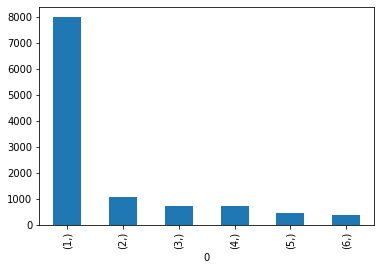

In [43]:
pd.DataFrame(y_pred).value_counts().plot(kind="bar")

<AxesSubplot:xlabel='0'>

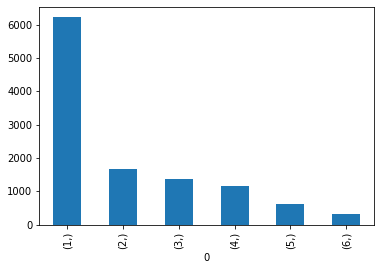

In [44]:
pd.DataFrame(y_test).value_counts().plot(kind="bar")

In [45]:
np.histogram(atari,bins=20)

(array([5893,  570,  169,   60,   22,   25,   17,    8,    2,    3,    2,
           1,    2,    0,    0,    1,    1,    1,    2,    1]),
 array([  1.   ,   7.435,  13.87 ,  20.305,  26.74 ,  33.175,  39.61 ,
         46.045,  52.48 ,  58.915,  65.35 ,  71.785,  78.22 ,  84.655,
         91.09 ,  97.525, 103.96 , 110.395, 116.83 , 123.265, 129.7  ]))